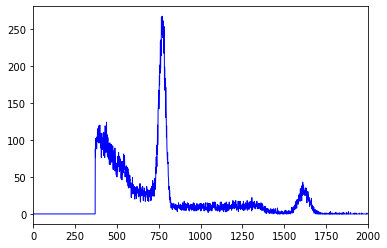

In [85]:
import csv
import matplotlib.pyplot as plt
import numpy as np

# change this to your directory containing sample data
loc = 'C://Users//Xiangyan Song//Desktop//Class material//phys 211 experimental physics 1//gamma//sample data'
source = 'Na-22'
thicks = [0, 4, 16]
trials = 2


# list of file names
files = [loc + f'//{source}_{th}mm-{tr+1}.csv' for th in thicks for tr in range(trials)]


# keys are file names (without .csv extension), value is a list of two lists.
#    first list is list of channel numbers (ints)
#    second list is list of counts (ints)        
data = {}
keys = [f'{source}_{th}mm-{tr+1}' for th in thicks for tr in range(trials)]
for i, file in enumerate(files):
    channels = []
    counts = []
    with open(file, 'r') as f:
        read_f = csv.reader(f, delimiter=',')
        for j in range(2):
            next(read_f)
        for line in read_f:
            for word in line:
                word = word.split()
            channels.append(int(line[0]))
            counts.append(int(line[1]))
        data[keys[i]] = [channels, counts]

max_value = max(sample[1])
max_index = sample[1].index(max_value)



In [83]:
low1 = 730
high1 = 810

low2 = 1570
high2 = 1680

total_count1 = 0
for i in range(low1, high1, 1):
    j = sample[0].index(i)
    total_count1 += sample[1][j]
    
total_count2 = 0
for i in range(low2, high2, 1):
    j = sample[0].index(i)
    total_count2 += sample[1][j]
    
print(total_count1)
print(total_count2)

16765
2707


In [90]:
def plot_spectrum(data, ax):
    ax.plot(data[0], data[1], c='b', linewidth=1)
    ax.set_xlim(0, 2000)

    
def counts(data, l1, h1, l2, h2):
    tc1 = 0
    tc2 = 0
    for i in range(l1, h1, 1):
        j = data[0].index(i)
        tc1 += data[1][j]
    for i in range(l2, h2, 1):
        j = data[0].index(i)
        tc2 += data[1][j]
    return tc1, tc2


def cross_section(detect, tot):
    cs = round(1 - detect/tot, 3)
    print(f"The total number of photons emitted is {tot}")
    print(f"The number of photons detected is {detect}")
    print(f"The cross section is {cs}\n")
    return cs


tc1_0mm_1, tc2_0mm_1 = counts(data['Na-22_0mm-1'], 730, 810, 1570, 1680)
tc1_16mm_1, tc2_16mm_1 = counts(data['Na-22_16mm-1'], 720, 810, 1570, 1670)

# energy ~ 500 keV
print("**** Gamma ~ 500 keV ****")
cs1 = cross_section(tc1_16mm_1, tc1_0mm_1)

print("**** Gamma ~ 1.2 MeV ****")
# energy ~ 1.2 MeV
cs2 = cross_section(tc2_16mm_1, tc2_0mm_1)


**** Gamma ~ 500 keV ****
The total number of photons emitted is 16765
The number of photons detected is 12803
The cross section is 0.236

**** Gamma ~ 1.2 MeV ****
The total number of photons emitted is 2707
The number of photons detected is 2225
The cross section is 0.178

